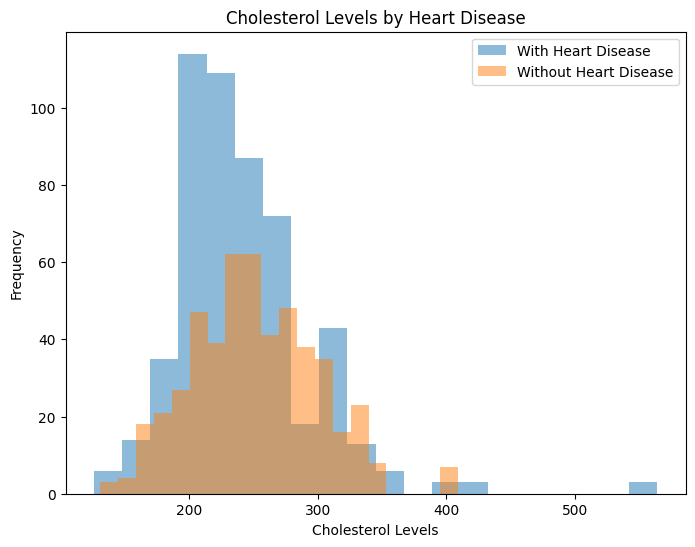

Hypothesis Test:
t-statistic: -3.213433097179175
p-value: 0.0013525712504626976

Confidence Interval for Cholesterol Levels with Heart Disease: (236.438435496363, 245.51973940857994)
Confidence Interval for Cholesterol Levels without Heart Disease: (246.9336896954613, 255.65148064522006)


In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the Heart Disease UCI dataset from the CSV file
csv_file_path = 'heart.csv'
df = pd.read_csv(csv_file_path)

# Perform exploratory data analysis (EDA)
# For simplicity, we will focus on the 'chol' (cholesterol) column and 'target' (presence of heart disease) column
eda_df = df[['chol', 'target']]

# Formulate hypothesis: Null hypothesis (H0) - There is no significant difference in cholesterol levels between patients with and without heart disease
# Alternative hypothesis (Ha) - There is a significant difference in cholesterol levels between the two groups

# Separate cholesterol levels of patients with and without heart disease
chol_with_heart_disease = eda_df[eda_df['target'] == 1]['chol']
chol_without_heart_disease = eda_df[eda_df['target'] == 0]['chol']

# Select statistical test: Independent t-test
# Conduct the hypothesis test
t_stat, p_value = stats.ttest_ind(chol_with_heart_disease, chol_without_heart_disease)

# Calculate confidence intervals
confidence_interval_with_heart_disease = stats.t.interval(0.95, len(chol_with_heart_disease) - 1, loc=np.mean(chol_with_heart_disease), scale=stats.sem(chol_with_heart_disease))
confidence_interval_without_heart_disease = stats.t.interval(0.95, len(chol_without_heart_disease) - 1, loc=np.mean(chol_without_heart_disease), scale=stats.sem(chol_without_heart_disease))



# Visualize cholesterol levels for patients with and without heart disease
plt.figure(figsize=(8, 6))
plt.hist(df[df['target'] == 1]['chol'], alpha=0.5, label='With Heart Disease', bins=20)
plt.hist(df[df['target'] == 0]['chol'], alpha=0.5, label='Without Heart Disease', bins=20)
plt.xlabel('Cholesterol Levels')
plt.ylabel('Frequency')
plt.title('Cholesterol Levels by Heart Disease')
plt.legend()
plt.show()


# Print the results
print("Hypothesis Test:")
print("t-statistic:", t_stat)
print("p-value:", p_value)
print("")

print("Confidence Interval for Cholesterol Levels with Heart Disease:", confidence_interval_with_heart_disease)
print("Confidence Interval for Cholesterol Levels without Heart Disease:", confidence_interval_without_heart_disease)
